In [1]:
# go go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from prepare import *
from helper_functions import *

sns.set()
pd.set_option('display.max_columns', None)

In [2]:
# load player data base, check info
pf = pd.read_csv('PlayerData.csv', index_col = 0)
pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 2087
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PlayerID                               382 non-null    int64  
 1   Player_Name                            382 non-null    object 
 2   Age                                    382 non-null    float64
 3   Height                                 379 non-null    float64
 4   MaxRank                                382 non-null    float64
 5   Hand                                   382 non-null    object 
 6   Country                                382 non-null    object 
 7   win_count                              382 non-null    float64
 8   lose_count                             382 non-null    float64
 9   match_count                            382 non-null    float64
 10  win%                                   382 non-null    float64
 11  aces_

In [3]:
# load matches dataframe
# df = prepare_atp()

# Explore
---

### Roger Federer
What makes Roger Federer a great player? Let's look at his overall stats for the past 21 years.

In [4]:
# lowercase column names so I don't have to press shift as much
pf.columns = pf.columns.str.lower()

In [5]:
# rename columns for clarity
pf = pf.rename(columns = {'maxrank': 'max_rank',
                          'ace_count': 'ace_total',
                          'aces_per_game': 'avg_aces_per_match',
                          'breakpoints_per_game': 'avg_breakpoints_per_match',
                          'first_serve_percentage_match_won': 'first_serve_percentage_matches_won',
                          'first_serve_percentage_match_lost': 'first_serve_percentage_matches_lost',
                          'first_serve_won_percentage_match_won': 'first_serve_won_percentage_matches_won',
                          'first_serve_won_percentage_match_lost': 'first_serve_won_percentage_matches_lost'
                         }
              )

In [6]:
# review columns
pf.head(1)

,playerid,player_name,age,height,max_rank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_total,avg_aces_per_match,first_serve_percentage_matches_lost,first_serve_percentage_matches_won,first_serve_won_percentage_matches_lost,first_serve_won_percentage_matches_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,avg_breakpoints_per_match,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%
0,103720,Lleyton Hewitt,20.752909,180.0,1.0,R,AUS,458.0,196.0,654.0,0.7,183.0,422.0,605.0,0.925,0.525558,0.539098,0.675974,0.77347,183.0,422.0,605.0,0.925076,134.0,110.0,351.0,184.0,244.0,535.0,0.54918,0.656075,265.0,118.0,383.0,0.691906,85.0,46.0,131.0,0.648855,93.0,27.0,120.0,0.775,15.0,5.0,20.0,0.75


In [7]:
# get concrete percentage column
# pf['hard_number_first_serve_percentage_match_won'] = pf.first_serve_percentage_match_won * 100
ratios = ['win%',
          'first_serve_percentage_matches_won',
          'first_serve_percentage_matches_lost',
          'first_serve_won_percentage_matches_lost',
          'first_serve_won_percentage_matches_won', 
          'top_30_win%',
          'top_100_win%',
          'hard_win%',
          'clay_win%',
          'grass_win%',
          'carpet_win%'
         ]

for decimal in ratios:
    pf[f'hard_number_{decimal}'] = pf[decimal] * 100

In [8]:
# get length of player database
len(pf)

382

There are 382 players in the database.

Who are these players?

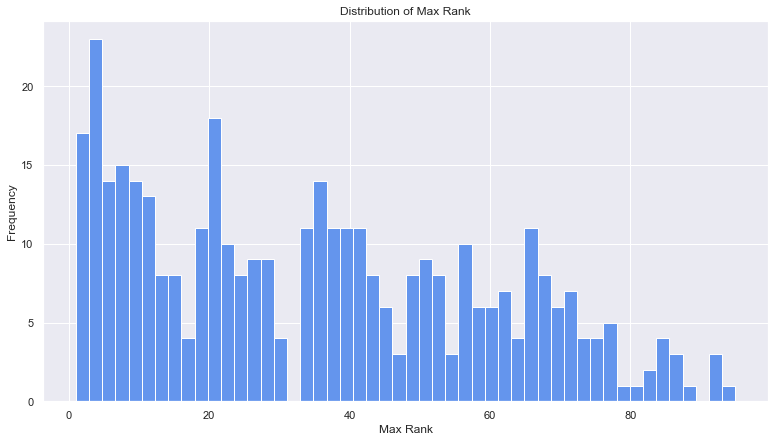

In [9]:
# plot distribution of max rank
plt.figure(figsize = (13, 7))
pf.max_rank.hist(color = 'cornflowerblue', bins = 50)
plt.ylabel('Frequency')
plt.xlabel('Max Rank')
plt.title('Distribution of Max Rank');

These players all achieved a rank of 100 or better within the years 1999-2019. These are 'Top-100' players.

In [10]:
# set a list of numeric columns
quant_vars = list(pf.select_dtypes('float64').columns)

In [11]:
# get all bounds for outliers
bounds = get_all_the_bounds(pf, quant_vars)
bounds

,lower_bound,upper_bound
feature,,
age,17.091718,35.752909
height,165.000000,205.000000
max_rank,-51.500000,118.500000
win_count,-134.625000,320.375000
lose_count,-88.500000,283.500000
match_count,-227.000000,621.000000
win%,0.205000,0.725000
aces_in_match_lost,-84.500000,271.500000
aces_in_match_won,-130.500000,305.500000


In [12]:
# get extreme bounds
extreme_bounds = get_all_the_bounds(pf, quant_vars, 3)
extreme_bounds

,lower_bound,upper_bound
feature,,
age,10.093771,42.750856
height,150.000000,220.000000
max_rank,-115.250000,182.250000
win_count,-305.250000,491.000000
lose_count,-228.000000,423.000000
match_count,-545.000000,939.000000
win%,0.010000,0.920000
aces_in_match_lost,-218.000000,405.000000
aces_in_match_won,-294.000000,469.000000


In [13]:
# summary statistics
pf[quant_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
age,382.0,26.490684,3.120101,19.178645,24.089665,26.331280,28.754962,36.418891
height,379.0,185.551451,6.791246,168.000000,180.000000,185.000000,190.000000,208.000000
max_rank,382.0,34.984293,24.577688,1.000000,12.250000,33.500000,54.750000,95.000000
win_count,382.0,114.301047,117.184114,13.000000,36.000000,69.000000,149.750000,907.000000
lose_count,382.0,103.285340,63.926219,25.000000,51.000000,83.000000,144.000000,327.000000
match_count,382.0,217.586387,172.181302,51.000000,91.000000,154.000000,303.000000,1119.000000
win%,382.0,0.470052,0.103475,0.230000,0.400000,0.460000,0.530000,0.840000
aces_in_match_lost,382.0,98.994764,61.980735,24.000000,49.000000,80.000000,138.000000,316.000000
aces_in_match_won,382.0,107.753927,112.718948,9.000000,33.000000,65.500000,142.000000,866.000000
ace_total,382.0,206.748691,165.921936,37.000000,84.250000,149.500000,290.500000,1068.000000


In [14]:
# pull up Roger Federer stats
rf = pf[pf.player_name == 'Roger Federer']
rf

,playerid,player_name,age,height,max_rank,hand,country,win_count,lose_count,match_count,win%,aces_in_match_lost,aces_in_match_won,ace_total,avg_aces_per_match,first_serve_percentage_matches_lost,first_serve_percentage_matches_won,first_serve_won_percentage_matches_lost,first_serve_won_percentage_matches_won,breakpoints_won_match_lost,breakpoints_won_match_won,breakpoint_count,avg_breakpoints_per_match,win_count_30,loss_count_30,win_count_100,loss_count_100,total_top30_matches,total_top100_matches,top_30_win%,top_100_win%,hard_surface_win,hard_surface_loss,hard_surface_match_count,hard_win%,clay_surface_win,clay_surface_loss,clay_surface_match_count,clay_win%,grass_surface_win,grass_surface_loss,grass_surface_match_count,grass_win%,carpet_surface_win,carpet_surface_loss,carpet_surface_match_count,carpet_win%,hard_number_win%,hard_number_first_serve_percentage_matches_won,hard_number_first_serve_percentage_matches_lost,hard_number_first_serve_won_percentage_matches_lost,hard_number_first_serve_won_percentage_matches_won,hard_number_top_30_win%,hard_number_top_100_win%,hard_number_hard_win%,hard_number_clay_win%,hard_number_grass_win%,hard_number_carpet_win%
133,103819,Roger Federer,22.485969,185.0,1.0,R,SUI,907.0,212.0,1119.0,0.81,202.0,866.0,1068.0,0.954,0.597457,0.629201,0.701538,0.796579,202.0,866.0,1068.0,0.954424,407.0,146.0,786.0,200.0,553.0,986.0,0.735986,0.79716,552.0,120.0,672.0,0.821429,189.0,57.0,246.0,0.768293,132.0,19.0,151.0,0.874172,34.0,16.0,50.0,0.68,81.0,62.920077,59.745743,70.153832,79.65789,73.598553,79.716024,82.142857,76.829268,87.417219,68.0


Let's look at aces 
* Roger Federer served 1068 aces from 1999 to 2019

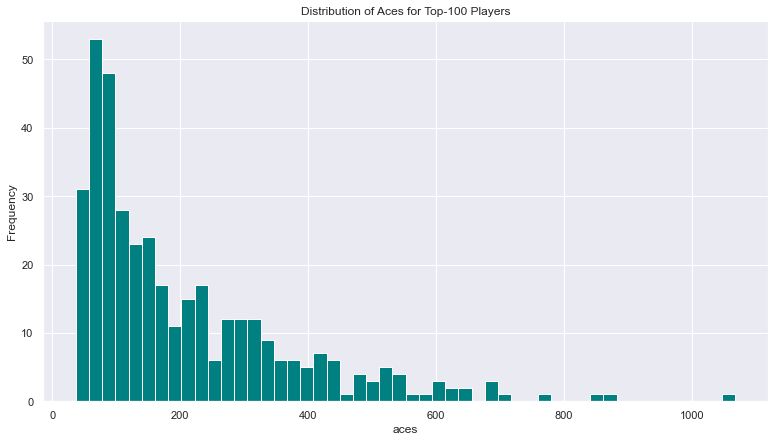

In [15]:
# plot distribution of aces
plt.figure(figsize = (13, 7))
pf.ace_total.hist(color = 'teal', bins = 50)
plt.ylabel('Frequency')
plt.xlabel('aces')
plt.title('Distribution of Aces for Top-100 Players');

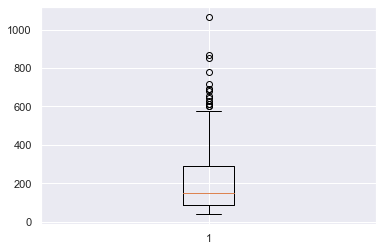

In [16]:
# view boxplot distribution of aces
plt.boxplot(pf.ace_total);

In [17]:
# view extreme upper bound for aces
extreme_bounds.loc['ace_total', 'upper_bound']

909.25

Roger Federer is an extreme outlier when it comes to aces.

Domain knowledge supplement (DKS): This is a lot of free points for Federer. One and done. That is much less work than playing out a 5, 10, or 20 ball rally. I wish I could somehow measure how much less stress this is on the mind and body.

Let's look at height.

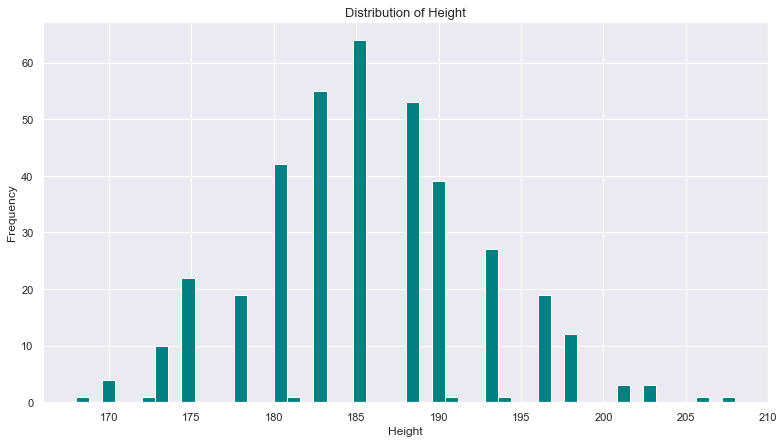

In [18]:
distribution(pf, 'height')

Roger Federer is right smack in the middle of a normal distribution of heights. He is not an outlier here. His height of 185 cm does not distinguish him as a great player.

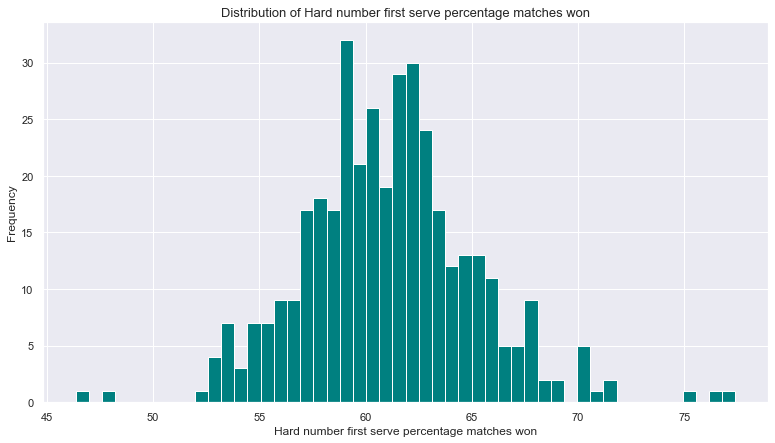

In [22]:
distribution(pf, 'hard_number_first_serve_percentage_matches_won')

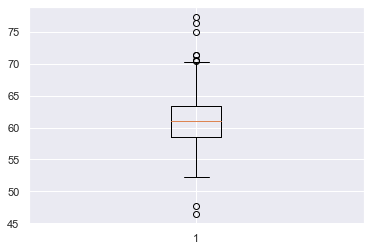

In [23]:
# look at box distribution of first serve percentage in matches won
plt.boxplot(pf.hard_number_first_serve_percentage_matches_won);

In [24]:
# get outlier bounds for first first serve percentage in matches won
get_lower_and_upper_bounds(pf['hard_number_first_serve_percentage_matches_won'])

(51.440765981849715, 70.45672371614853)

In [26]:
# pull up 
rf.hard_number_first_serve_percentage_matches_won

133    62.920077
Name: hard_number_first_serve_percentage_matches_won, dtype: float64

Roger Federer is not an outlier here, but instead is marginally above average when it comes to percentage of first serves served in matches won.

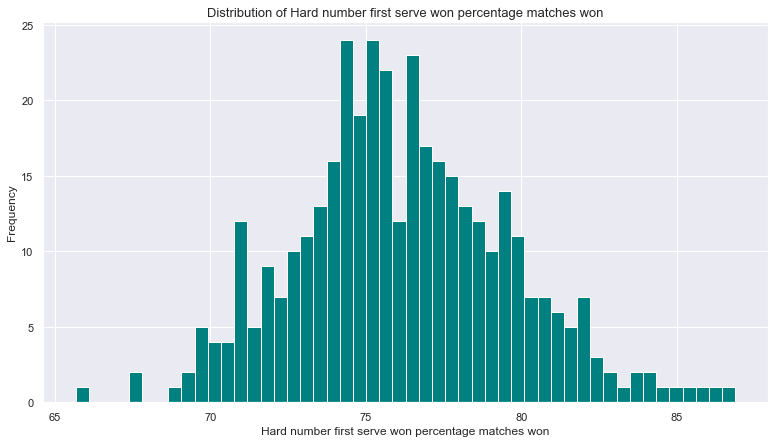

In [27]:
distribution(pf, 'hard_number_first_serve_won_percentage_matches_won')

In [28]:
bounds.loc['hard_number_first_serve_won_percentage_matches_won', 'upper_bound']

84.90694982134664

In [29]:
rf.hard_number_first_serve_won_percentage_matches_won

133    79.65789
Name: hard_number_first_serve_won_percentage_matches_won, dtype: float64

Roger Federer is above average when it comes to percent of first serve points won, but not an outlier. Still, this is an important metric.

### Roger Federer vs Novak Djokovic

## Initial Questions
I. How do key rivalries play out on clay? On grass? On hard court?

II. How do key rivalries play out in best of 3 matches vs best of 5? Do rivalries take a different story at Grand Slam events?

III. Often players will rake in many wins against a rival, and then the dynamic will significantly change, and the rival will rake most of the wins in. What are the drivers that determine a change in the dynamic between two players? Is there anything in our data set to suggest a change in dynamic?

### EQ I

In [ ]:
# collect all records of Roger Federer vs Novak Djokovic
fed_v_djok = df[(df.player_1 == 'Roger Federer') & (df.player_2 == 'Novak Djokovic')]
djok_v_fed = df[(df.player_1 == 'Novak Djokovic') & (df.player_2 == 'Roger Federer')]

# slam records together
Federer_vs_Djokovic = pd.concat([fed_v_djok, djok_v_fed])

In [ ]:
# preview
Federer_vs_Djokovic.head(2)

In [ ]:
# tail end of data
Federer_vs_Djokovic.tail(2)

In [ ]:
# Djokovic is always player 1 in our data set
Federer_vs_Djokovic.player_1.value_counts()

How does their rivary play out on different surfaces?

In [ ]:
Federer_vs_Djokovic[Federer_vs_Djokovic.surface == 'Clay'].player_1_wins

In [ ]:
Federer_vs_Djokovic[Federer_vs_Djokovic.surface == 'Grass'].player_1_wins

In [ ]:
Federer_vs_Djokovic[Federer_vs_Djokovic.surface == 'Hard'].player_1_wins

In [ ]:
# add year column 
Federer_vs_Djokovic['year'] = (Federer_vs_Djokovic['tourney_id'].str[0:4]).astype(int)

In [ ]:
get_wins_timeline(Federer_vs_Djokovic)

In [ ]:
get_pies_upsets(Federer_vs_Djokovic)